In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string, os 
import tensorflow as tf

# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional,GRU ,Conv1D,GlobalMaxPooling1D,Flatten
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_lyrics_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.lower()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']
  return corpus
def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer


In [ ]:
# Read the dataset from csv - this time with 250 songs
dataset = pd.read_csv('songdata.csv', dtype=str)
# Create the corpus using the 'text' column containing lyrics
corpus = create_lyrics_corpus(dataset, 'text')
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus, num_words=2000)
total_words = tokenizer.num_words

# There should be a lot more words now
print(total_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


2000


In [ ]:
sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
X, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
sequences[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  111,   66],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  111,   66,   86],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,  111,   66,   86,  206],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  111,   66,   86,  206,   29],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,  111,   66,   86,  206,   29,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  111,   66,   86,  206,   29,    4, 1196],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  111,   66,   86,  206,   29,    4, 1196,  206],
       [   0,    0,    0,    0,    0,    

In [ ]:
epoch=100

#GRU

In [ ]:
GRU_model = keras.Sequential()
GRU_model.add(Embedding(total_words, 40, input_length=max_sequence_len-1))
GRU_model.add(GRU(55))
GRU_model.add(Flatten())
GRU_model.add(Dense(total_words, activation='softmax'))
GRU_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_GRU = GRU_model.fit(X, y, epochs=epoch, verbose=1)

Epoch 1/100
1480/1480 [==============================] - 32s 19ms/step - loss: 5.8598 - accuracy: 0.0549
Epoch 2/100
1480/1480 [==============================] - 29s 19ms/step - loss: 5.2226 - accuracy: 0.1022
Epoch 3/100
1480/1480 [==============================] - 28s 19ms/step - loss: 4.8077 - accuracy: 0.1459
Epoch 4/100
1480/1480 [==============================] - 28s 19ms/step - loss: 4.4891 - accuracy: 0.1825
Epoch 5/100
1480/1480 [==============================] - 27s 18ms/step - loss: 4.2321 - accuracy: 0.2133
Epoch 6/100
1480/1480 [==============================] - 28s 19ms/step - loss: 4.0152 - accuracy: 0.2424
Epoch 7/100
1480/1480 [==============================] - 26s 18ms/step - loss: 3.8283 - accuracy: 0.2665
Epoch 8/100
1480/1480 [==============================] - 27s 19ms/step - loss: 3.6654 - accuracy: 0.2903
Epoch 9/100
1480/1480 [==============================] - 27s 18ms/step - loss: 3.5222 - accuracy: 0.3112
Epoch 10/100
1480/1480 [==============================]

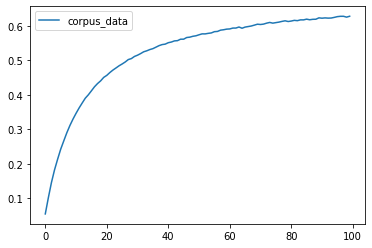

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history_GRU.history['accuracy'], label='corpus_data')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Deep Bidirectional LSTM

In [10]:
Deep_LSTM = Sequential()
Deep_LSTM.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
Deep_LSTM.add(Bidirectional(LSTM(64, return_sequences=True)))
Deep_LSTM.add(Bidirectional(LSTM(32, return_sequences=True)))
Deep_LSTM.add(Bidirectional(LSTM(32)))
Deep_LSTM.add(Dense(total_words, activation='softmax'))
Deep_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_DBLSTM = Deep_LSTM.fit(X, y, epochs=epoch, verbose=1)

Epoch 1/100
1480/1480 [==============================] - 104s 62ms/step - loss: 5.9696 - accuracy: 0.0461
Epoch 2/100
1480/1480 [==============================] - 93s 63ms/step - loss: 5.5522 - accuracy: 0.0556
Epoch 3/100
1480/1480 [==============================] - 93s 63ms/step - loss: 5.3422 - accuracy: 0.0750
Epoch 4/100
1480/1480 [==============================] - 90s 61ms/step - loss: 5.1723 - accuracy: 0.0966
Epoch 5/100
1480/1480 [==============================] - 90s 61ms/step - loss: 5.0305 - accuracy: 0.1109
Epoch 6/100
1480/1480 [==============================] - 85s 57ms/step - loss: 4.8990 - accuracy: 0.1195
Epoch 7/100
1480/1480 [==============================] - 84s 57ms/step - loss: 4.7880 - accuracy: 0.1293
Epoch 8/100
1480/1480 [==============================] - 84s 57ms/step - loss: 4.6802 - accuracy: 0.1383
Epoch 9/100
1480/1480 [==============================] - 84s 57ms/step - loss: 4.5817 - accuracy: 0.1460
Epoch 10/100
1480/1480 [==============================

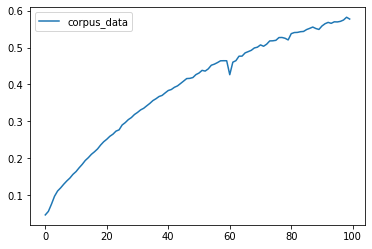

<Figure size 432x288 with 0 Axes>

In [11]:
plt.plot(history_DBLSTM.history['accuracy'], label='corpus_data')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Conv1D

In [15]:
con1D = Sequential()
con1D.add(Embedding(total_words, 80, input_length=max_sequence_len-1))
con1D.add(Conv1D(80,kernel_size=3,padding='same',activation='relu',strides=1))
con1D.add(GlobalMaxPooling1D())
con1D.add(Dense(total_words, activation='softmax')) 
con1D.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = con1D.fit(X, y, epochs=epoch, verbose=1)

Epoch 1/100
1480/1480 [==============================] - 16s 10ms/step - loss: 5.9949 - accuracy: 0.0565
Epoch 2/100
1480/1480 [==============================] - 13s 9ms/step - loss: 5.2928 - accuracy: 0.1165
Epoch 3/100
1480/1480 [==============================] - 13s 9ms/step - loss: 4.7023 - accuracy: 0.1747
Epoch 4/100
1480/1480 [==============================] - 13s 9ms/step - loss: 4.1976 - accuracy: 0.2294
Epoch 5/100
1480/1480 [==============================] - 13s 9ms/step - loss: 3.7393 - accuracy: 0.2855
Epoch 6/100
1480/1480 [==============================] - 13s 9ms/step - loss: 3.3475 - accuracy: 0.3371
Epoch 7/100
1480/1480 [==============================] - 13s 9ms/step - loss: 3.0259 - accuracy: 0.3832
Epoch 8/100
1480/1480 [==============================] - 13s 9ms/step - loss: 2.7672 - accuracy: 0.4204
Epoch 9/100
1480/1480 [==============================] - 13s 9ms/step - loss: 2.5664 - accuracy: 0.4540
Epoch 10/100
1480/1480 [==============================] - 13s 9

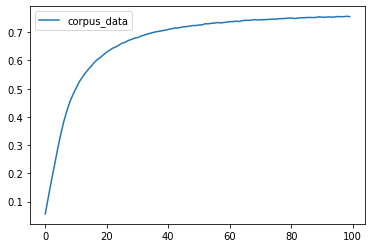

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(history.history['accuracy'], label='corpus_data')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Bidirectional LSTM

In [19]:
Bi_dir = Sequential()
Bi_dir.add(Embedding(total_words, 70, input_length=max_sequence_len-1))
Bi_dir.add(Bidirectional(LSTM(22)))
Bi_dir.add(Dense(total_words, activation='softmax'))
Bi_dir.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_Bi_dir = Bi_dir.fit(X, y, epochs=epoch, verbose=1)

Epoch 1/100
1480/1480 [==============================] - 78s 19ms/step - loss: 5.9763 - accuracy: 0.0467
Epoch 2/100
1480/1480 [==============================] - 29s 20ms/step - loss: 5.6565 - accuracy: 0.0524
Epoch 3/100
1480/1480 [==============================] - 29s 20ms/step - loss: 5.4566 - accuracy: 0.0698
Epoch 4/100
1480/1480 [==============================] - 28s 19ms/step - loss: 5.2880 - accuracy: 0.0963
Epoch 5/100
1480/1480 [==============================] - 28s 19ms/step - loss: 5.1092 - accuracy: 0.1238
Epoch 6/100
1480/1480 [==============================] - 29s 19ms/step - loss: 4.9511 - accuracy: 0.1404
Epoch 7/100
1480/1480 [==============================] - 28s 19ms/step - loss: 4.8130 - accuracy: 0.1499
Epoch 8/100
1480/1480 [==============================] - 28s 19ms/step - loss: 4.6775 - accuracy: 0.1628
Epoch 9/100
1480/1480 [==============================] - 28s 19ms/step - loss: 4.5426 - accuracy: 0.1753
Epoch 10/100
1480/1480 [==============================]

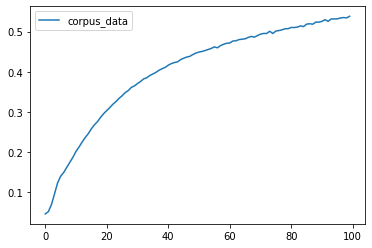

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(history_Bi_dir.history['accuracy'], label='corpus_data')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
Lstm = Sequential()
Lstm.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
Lstm.add(LSTM(32))
Lstm.add(Dense(total_words, activation='softmax'))
Lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_Lstm = Lstm.fit(X, y, epochs=epoch, verbose=1)

Epoch 1/100
1480/1480 [==============================] - 22s 14ms/step - loss: 5.9991 - accuracy: 0.0464
Epoch 2/100
1480/1480 [==============================] - 20s 13ms/step - loss: 5.7109 - accuracy: 0.0490
Epoch 3/100
1480/1480 [==============================] - 20s 13ms/step - loss: 5.4655 - accuracy: 0.0692
Epoch 4/100
1480/1480 [==============================] - 20s 14ms/step - loss: 5.2490 - accuracy: 0.0975
Epoch 5/100
1480/1480 [==============================] - 20s 14ms/step - loss: 5.0751 - accuracy: 0.1187
Epoch 6/100
1480/1480 [==============================] - 22s 15ms/step - loss: 4.9106 - accuracy: 0.1388
Epoch 7/100
1480/1480 [==============================] - 20s 14ms/step - loss: 4.7613 - accuracy: 0.1530
Epoch 8/100
1480/1480 [==============================] - 20s 14ms/step - loss: 4.6233 - accuracy: 0.1673
Epoch 9/100
1480/1480 [==============================] - 20s 14ms/step - loss: 4.4956 - accuracy: 0.1792
Epoch 10/100
1480/1480 [==============================]

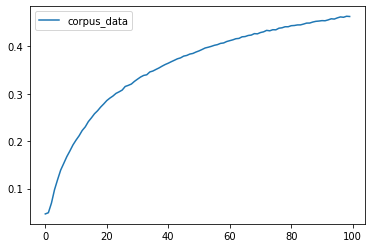

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(history_Lstm.history['accuracy'], label='corpus_data')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Song Generator

In [30]:
model= GRU_model
seed_text = "the book of love the world"
next_words = 100
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted_probs = model.predict(token_list)[0]
  predicted = np.random.choice([x for x in range(len(predicted_probs))],
                               p=predicted_probs)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

the book of love the world of dreams i belong with it in the mirror of your smile and your ball is always too get off the street yeah all these head at bed questions oh before it would you bring but who may come back too far away that my result fell softly on the wall of your face my ground romance time hells mind tip piece of living in mind so cold days honey you were next tears would start to sing my heart and roll a most most hearts take anymore i know under you never thought everything how i do i i
